# Linear Regression

In [54]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Create data

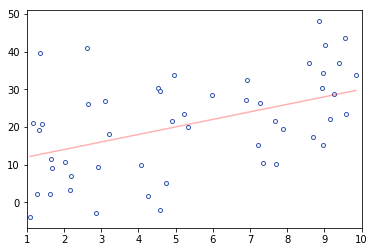

In [115]:
# define parameters
n = 50
domain = 1, 10
model = lambda x: 2*x + 10                           # eerste graads = lineair
# model = lambda x: 0.5 * (4 - x) ** 2 + 10            # tweede graads polynoom = parabool
# model = lambda x: (x-5)**3 + 0*x**2 + 9*(x-5) + 0    # derde graads polynoom
# domain = -5, 5
# model = lambda x: 7.1 + 3.1 * x + 2 * x ** 2
noise = 10  # standard deviation

np.random.seed(1000)

# generate data
x_min, x_max = domain
x = np.sort( np.random.rand(n) * (x_max - x_min) + x_min )
y_model = model(x)
y = y_model + (np.random.randn(n)) * noise

# put data in Pandas dataframe
df = pd.DataFrame({'x': x, 'y': y})

# show
plt.plot(x, y_model, 'r', alpha=0.3)
plt.scatter(x, y, marker='o', color='w', edgecolors='#3355AA', s=16)
plt.xlim(x_min, x_max)
plt.show()

### Plot with Seaborn

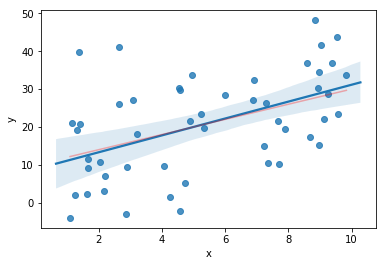

In [116]:
g = sns.regplot(data=df, x='x', y='y')
plt.plot(x, y_model, 'r', alpha=0.3)

### Linear Regression using np.polyfit

In [119]:
p = np.polyfit(x, y, 1)

print('%-15s : %7.3f' % ('slope', p[0]))
print('%-15s : %7.3f' % ('intercept', p[1]))
# print('%-15s : %7.3f' % ('kwadraat', p[2]))

slope           :   2.229
intercept       :   8.858


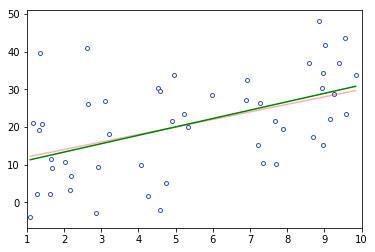

In [120]:
f = np.poly1d(p)               # So we can call f(x)

plt.plot(x, y_model, 'r', alpha=0.3)
plt.scatter(x, y, marker='o', color='w', edgecolors='#3355AA', s=16)
plt.plot(x, f(x), 'g')
plt.xlim(x_min, x_max)
plt.show()

### Linear Regression using scipy.stats.linregress

In [121]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print('%-15s : %7.3f' % ('slope', slope))
print('%-15s : %7.3f' % ('intercept', intercept))
print('%-15s : %7.3f' % ('r value', r_value))
print('%-15s : %7.3f' % ('p value', p_value))
print('%-15s : %7.3f' % ('standard error', std_err))

slope           :   2.229
intercept       :   8.858
r value         :   0.502
p value         :   0.000
standard error  :   0.554


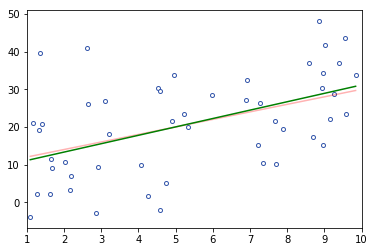

In [122]:
plt.plot(x, y_model, 'r', alpha=0.3)
plt.scatter(x, y, marker='o', color='w', edgecolors='#3355AA', s=16)
plt.plot(x, x*slope+intercept, 'g')
plt.xlim(x_min, x_max)
plt.show()

### Linear Regression Manually

The regression equation would then be: $ y = \beta_0 + \beta_1(x) +e $

Where $\beta_0$ is the intercept, $\beta_1$ the slope and e the residual error. 

There are five values required for the calculation of a regression line:

- The mean of x: mean_x,
- The mean of y: mean_y,
- The standard deviation of x: sd_x,
- The standard deviation of y: sd_y, and
- The correlation coefficient between x and y: r.

Calculate the slope of this regression line. The general formula for the slope is: $ \beta_1 = r \cdot 
{sd(y)} \;/\; {sd(x)} $

Calculate the intercept. The general formula for the intercept: is $ \beta_0 = mean(y) − \beta_1 \cdot mean(x) $

In [74]:
def calculate_mean_and_std(x):
    n = x.size                # number of samples
    sum_x = np.sum(x)         # sum of samples
    mean_x = sum_x / n        # mean of samples
    e = x - mean_x            # errors from mean
    sum_e2 = np.sum(e ** 2)   # sum of square errors
    var_x = sum_e2 / (n - 1)  # variance
    std_x = var_x ** 0.5      # standard deviation
    return mean_x, std_x

def calculate_correlation_coefficient(x, y):
    n = x.size
    mean_x, std_x = calculate_mean_and_std(x)
    mean_y, std_y = calculate_mean_and_std(y)
    covariance = np.sum((x - mean_x) * (y - mean_y)) / (n - 1)
    correlation = covariance / (std_x * std_y)
    return correlation

mean_x, std_x = calculate_mean_and_std(x)
mean_y, std_y = calculate_mean_and_std(y)

r = calculate_correlation_coefficient(x, y)

print('%-45s : %7.3f' % ('mean of x', mean_x))
print('%-45s : %7.3f' % ('mean of y', mean_y))
print('%-45s : %7.3f' % ('standard deviation of x', std_x))
print('%-45s : %7.3f' % ('standard deviation of y', std_y))
print('%-45s : %7.3f' % ('correlation coefficient between x and y (r)', r))

mean of x                                     :   5.343
mean of y                                     :  20.785
standard deviation of x                       :   2.983
standard deviation of y                       :  15.329
correlation coefficient between x and y (r)   :   0.443


In [75]:
mean_x = x.mean()
mean_y = y.mean()
sd_x = x.std()
sd_y = y.std()
r = np.corrcoef(x, y)[0, 1]

print('%-45s : %7.3f' % ('mean of x', mean_x))
print('%-45s : %7.3f' % ('mean of y', mean_y))
print('%-45s : %7.3f' % ('standard deviation of x', sd_x))
print('%-45s : %7.3f' % ('standard deviation of y', sd_y))
print('%-45s : %7.3f' % ('correlation coefficient between x and y (r)', r))

mean of x                                     :   5.343
mean of y                                     :  20.785
standard deviation of x                       :   2.953
standard deviation of y                       :  15.175
correlation coefficient between x and y (r)   :   0.443


In [76]:
B1 = r * sd_y / sd_x
B0 = mean_y - B1 * mean_x

print('%-15s : %7.3f' % ('slope', B1))
print('%-15s : %7.3f' % ('intercept', B0))

slope           :   2.275
intercept       :   8.629


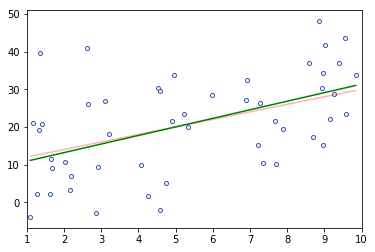

In [123]:
plt.plot(x, y_model, 'r', alpha=0.3)
plt.scatter(x, y, marker='o', color='w', edgecolors='#3355AA', s=16)
plt.plot(x, x*B1+B0, 'g')
plt.xlim(x_min, x_max)
plt.show()

### Normalize data

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

print(scaler.fit(df))
print(scaler.mean_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[ 5.3426498 20.7687978]


### Transform data to normalized data

In [135]:
np_normalized = scaler.transform(df)
df_normalized = pd.DataFrame({'x': np_normalized.T[0], 'y': np_normalized.T[1]})
df_normalized

,x,y
0,-1.438641,-1.888474
1,-1.415111,0.017571
2,-1.382083,-1.422512
3,-1.363420,-0.124521
4,-1.346343,1.446074
5,-1.331904,0.005301
6,-1.258359,-1.409854
7,-1.247574,-0.704195
8,-1.243199,-0.888940
9,-1.119933,-0.762884


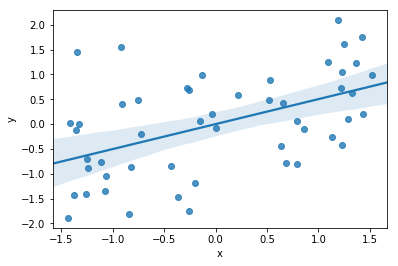

In [141]:
g = sns.regplot(data=df_normalized, x='x', y='y')

### Transform normalized data back to original data

In [138]:
np_original = scaler.inverse_transform(df_normalized)
df_original = pd.DataFrame({'x': np_original.T[0], 'y': np_original.T[1]})
df_original

,x,y
0,1.093795,-3.992232
1,1.163289,20.999186
2,1.260835,2.117299
3,1.315953,19.136120
4,1.366387,39.729232
5,1.409031,20.838308
6,1.626239,2.283265
7,1.658089,11.535633
8,1.671011,9.113316
9,2.035062,10.766120


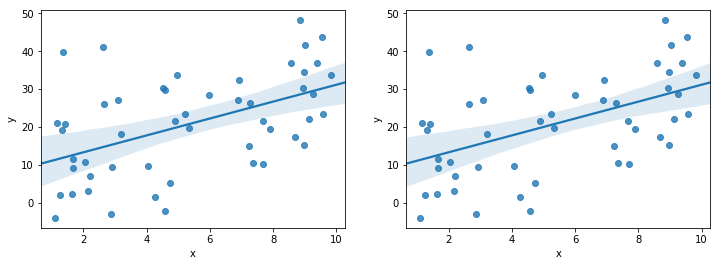

In [150]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
g = sns.regplot(data=df_original, x='x', y='y')
plt.subplot(1, 2, 2)
g = sns.regplot(data=df, x='x', y='y')